Downloading S&P500 Price Data

In [471]:
# Call Yahoo Finance API to download daily stock and index prices
import yfinance as yf
import matplotlib
import pandas as pd
import os

In [472]:
# Downlad price history for a single symbol with .Ticker
nasdaq = yf.Ticker("^IXIC")

# Query Historical Prices
nasdaq = nasdaq.history(period="max")

In [473]:
nasdaq

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,0.0,0.0
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,0.0,0.0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,0.0,0.0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,0.0,0.0
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,0.0,0.0
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,0.0,0.0
2025-06-24 00:00:00-04:00,19809.619141,19946.720703,19795.289062,19912.529297,8330090000,0.0,0.0


In [474]:
nasdaq.index

DatetimeIndex(['1971-02-05 00:00:00-05:00', '1971-02-08 00:00:00-05:00',
               '1971-02-09 00:00:00-05:00', '1971-02-10 00:00:00-05:00',
               '1971-02-11 00:00:00-05:00', '1971-02-12 00:00:00-05:00',
               '1971-02-16 00:00:00-05:00', '1971-02-17 00:00:00-05:00',
               '1971-02-18 00:00:00-05:00', '1971-02-19 00:00:00-05:00',
               ...
               '2025-06-12 00:00:00-04:00', '2025-06-13 00:00:00-04:00',
               '2025-06-16 00:00:00-04:00', '2025-06-17 00:00:00-04:00',
               '2025-06-18 00:00:00-04:00', '2025-06-20 00:00:00-04:00',
               '2025-06-23 00:00:00-04:00', '2025-06-24 00:00:00-04:00',
               '2025-06-25 00:00:00-04:00', '2025-06-26 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=13713, freq=None)

#### Cleaning and Visualizing NASDAQ Data

Visually inspect data to determine appropriate trends/ timeline

<Axes: xlabel='Date'>

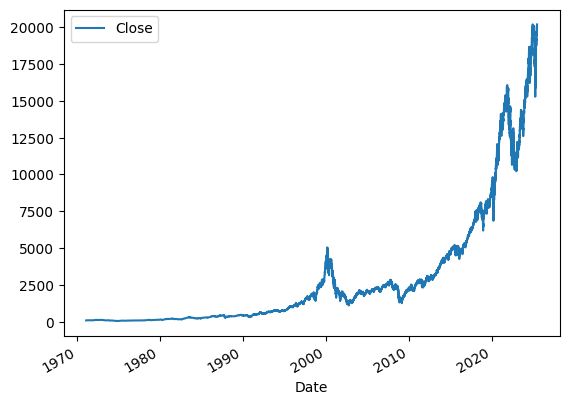

In [475]:
# Plot trend of data using DateTime index
nasdaq.plot.line(y="Close", use_index=True)

In [476]:
# Data cleaning to remove unessacary columns
del nasdaq["Dividends"]
del nasdaq["Stock Splits"]

#### Setting target for Machine Learning

In [477]:
# Set tomorrow's value
nasdaq["Tomorrow"] = nasdaq["Close"].shift(-1)


In [478]:
# Set Target (1 = positive direction and 0 = negative direction)
nasdaq["Target"] = (nasdaq["Tomorrow"] > nasdaq["Close"]).astype(int)

nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1971-02-05 00:00:00-05:00,100.000000,100.000000,100.000000,100.000000,0,100.839996,1
1971-02-08 00:00:00-05:00,100.839996,100.839996,100.839996,100.839996,0,100.760002,0
1971-02-09 00:00:00-05:00,100.760002,100.760002,100.760002,100.760002,0,100.690002,0
1971-02-10 00:00:00-05:00,100.690002,100.690002,100.690002,100.690002,0,101.449997,1
1971-02-11 00:00:00-05:00,101.449997,101.449997,101.449997,101.449997,0,102.050003,1
...,...,...,...,...,...,...,...
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,19630.970703,1
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297,1
2025-06-24 00:00:00-04:00,19809.619141,19946.720703,19795.289062,19912.529297,8330090000,19973.550781,1


In [479]:
# Only use data after the year 2000 (Do this to eliminate any large market shift that may influence the overall direction of the market)
nasdaq = nasdaq.loc["2000-01-01":].copy()

nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2000-01-03 00:00:00-05:00,4186.189941,4192.189941,3989.709961,4131.149902,1510070000,3901.689941,0
2000-01-04 00:00:00-05:00,4020.000000,4073.250000,3898.229980,3901.689941,1511840000,3877.540039,0
2000-01-05 00:00:00-05:00,3854.350098,3924.209961,3734.870117,3877.540039,1735670000,3727.129883,0
2000-01-06 00:00:00-05:00,3834.439941,3868.760010,3715.620117,3727.129883,1598320000,3882.620117,1
2000-01-07 00:00:00-05:00,3711.090088,3882.669922,3711.090088,3882.620117,1634930000,4049.669922,1
...,...,...,...,...,...,...,...
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,19630.970703,1
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297,1
2025-06-24 00:00:00-04:00,19809.619141,19946.720703,19795.289062,19912.529297,8330090000,19973.550781,1


#### Train a machine learning model

In [480]:
# Random Forest can pick up non linear relationships
from sklearn.ensemble import RandomForestClassifier

# n_estimators is number of Random decision models I want to train (test different values higher could mean better accuracy)
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1) # min_sa helps stop overfitting, random_state will rerun predicatable model

train = nasdaq.iloc[:-100] # All rows except last 100
test = nasdaq.iloc[-100:] # Last 100 rows

print(len(train), len(test))

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

6309 100


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,100
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [481]:
from sklearn.metrics import precision_score # Adjust metric to measure preformance

preds = model.predict(test[predictors])

# put into Pandas dataframe
preds = pd.Series(preds, index=test.index)

preds

Date
2025-02-03 00:00:00-05:00    1
2025-02-04 00:00:00-05:00    1
2025-02-05 00:00:00-05:00    1
2025-02-06 00:00:00-05:00    1
2025-02-07 00:00:00-05:00    0
                            ..
2025-06-20 00:00:00-04:00    1
2025-06-23 00:00:00-04:00    1
2025-06-24 00:00:00-04:00    0
2025-06-25 00:00:00-04:00    0
2025-06-26 00:00:00-04:00    0
Length: 100, dtype: int64

In [482]:
precision_score(test["Target"], preds)

0.5568181818181818

<Axes: xlabel='Date'>

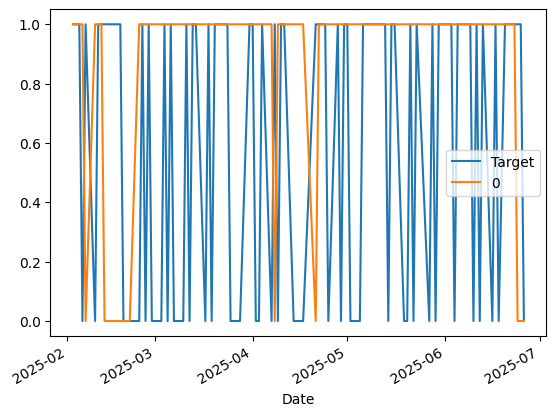

In [483]:
# Plot predictions and combine actul values with predicted values 
combined = pd.concat([test["Target"], preds], axis=1)

combined.plot()

#### Building a Backtesting System

In [484]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
combined

,Target,0
Date,,
2025-02-03 00:00:00-05:00,1,1
2025-02-04 00:00:00-05:00,1,1
2025-02-05 00:00:00-05:00,1,1
2025-02-06 00:00:00-05:00,0,1
2025-02-07 00:00:00-05:00,1,0
...,...,...
2025-06-20 00:00:00-04:00,1,1
2025-06-23 00:00:00-04:00,1,1
2025-06-24 00:00:00-04:00,1,0


In [485]:
# Get predictions for alot of different years to have more confidence in model
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [486]:
predictions = backtest(nasdaq, model, predictors)

In [487]:
predictions["Predictions"].value_counts()

Predictions
0    2419
1    1490
Name: count, dtype: int64

In [488]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5523489932885906

##### Creating a target to surpase with Model

In [489]:
# Number of Days NASDAQ actually rose
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.557687
0    0.442313
Name: count, dtype: float64

#### Adding Additional Predictiors to the Model

In [490]:
# Create varitey of rolling averages
horizons = [2,5,60,250,1000] # Horizons on how to look at rolling means. 2 days, 5 trading days,3 months 60 trading days, 250 = 1 year, 4 years =1000
new_predictors = []

for horizon in horizons:
    rolling_averages = nasdaq.rolling(horizon).mean()

    ratio_column = f"Close_ratio_{horizon}"
    nasdaq[ratio_column] = nasdaq["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    nasdaq[trend_column] = nasdaq.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]


In [491]:
nasdaq = nasdaq.dropna()
nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1970.369995,1979.739990,1970.369995,1973.140015,530810000,2006.479980,1,1.000992,1.0,1.004248,3.0,1.021215,33.0,1.201956,131.0,0.876518,494.0
2003-12-29 00:00:00-05:00,1976.930054,2006.479980,1976.930054,2006.479980,1413210000,2009.880005,1,1.008378,2.0,1.015484,4.0,1.036947,33.0,1.220270,132.0,0.892079,495.0
2003-12-30 00:00:00-05:00,2003.979980,2010.130005,1997.819946,2009.880005,1544270000,2003.369995,0,1.000847,2.0,1.011667,4.0,1.037549,33.0,1.220482,132.0,0.894334,496.0
2003-12-31 00:00:00-05:00,2010.640015,2015.229980,1996.619995,2003.369995,1775710000,2006.680054,1,0.998378,1.0,1.005496,3.0,1.033211,32.0,1.214711,131.0,0.892121,496.0
2004-01-02 00:00:00-05:00,2011.079956,2022.369995,1999.770020,2006.680054,1666780000,2047.359985,1,1.000825,1.0,1.003385,4.0,1.034040,32.0,1.214993,131.0,0.894342,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-18 00:00:00-04:00,19526.919922,19660.769531,19489.560547,19546.269531,7818790000,19447.410156,0,1.000645,1.0,0.998911,3.0,1.081872,34.0,1.062633,143.0,1.322100,537.0
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,19630.970703,1,0.997465,1.0,0.996048,2.0,1.075234,33.0,1.056862,143.0,1.314961,537.0
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297,1,1.004697,1.0,1.003147,3.0,1.083653,34.0,1.066387,144.0,1.326912,537.0


#### Improving the model

In [492]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [493]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    # Make model more confident in predictions
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined



In [494]:
predictions = backtest(nasdaq, model, new_predictors)

In [495]:
predictions["Predictions"].value_counts()

Predictions
0.0    2515
1.0     393
Name: count, dtype: int64

In [496]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5343511450381679

### Natural Language Processing of Sentiment Scores from r/Wallstreetbets

In [497]:
import csv
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [498]:
# Load SpaCy and add SpaCyTextBlob
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

# List to hold date/polarity rows
sentiment_scores = []

file_path = 'nasdaq_posts.csv'

# Open CSV and analyze sentiment for each row
with open(file_path, mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)

    for row in reader:
        title = row['Title']
        body = row['Body']
        date = row['Date']
        text = f"{title} {body}"  # Combine title and body

        doc = nlp(text)
        polarity = doc._.blob.polarity

        if polarity > 0:
            sentiment_label = "Positive"
        elif polarity < 0:
            sentiment_label = "Negative"
        else:
            sentiment_label = "Neutral"
        
        # Append (date, polarity) as a list
        sentiment_scores.append([date, round(polarity, 3)])
        
    
        print(f"Title: {title[:60]}...")
        print(f"Polarity score: {polarity:.3f} ({sentiment_label})")
        print(f"Date: {date}")
        print("-" * 50)

        
        

Title: Nasdaq didnt reclaim 10%. Dollar lost 9%....
Polarity score: 0.200 (Positive)
Date: 2025-04-14 02:18:27
--------------------------------------------------
Title: This morning NASDAQ dropped more than during Lehman Monday...
Polarity score: 0.250 (Positive)
Date: 2025-04-03 10:46:42
--------------------------------------------------
Title: Biggest one-day gain for the NASDAQ since 10/13/2008 - but d...
Polarity score: 0.011 (Positive)
Date: 2025-04-09 18:22:21
--------------------------------------------------
Title: Elon Musk's Brother Kimbal Musk And Other Tesla Execs Sell O...
Polarity score: -0.125 (Negative)
Date: 2025-02-07 10:41:24
--------------------------------------------------
Title: Jacked to the tits on puts - If NASDAQ is red tomorrow I'm 1...
Polarity score: 0.098 (Positive)
Date: 2024-12-01 18:16:20
--------------------------------------------------
Title: For all the idiots screaming bubble, here's what the Nasdaq ...
Polarity score: -0.800 (Negative)
Date: 2024

In [499]:
nasdaq

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2003-12-26 00:00:00-05:00,1970.369995,1979.739990,1970.369995,1973.140015,530810000,2006.479980,1,1.000992,1.0,1.004248,3.0,1.021215,33.0,1.201956,131.0,0.876518,494.0
2003-12-29 00:00:00-05:00,1976.930054,2006.479980,1976.930054,2006.479980,1413210000,2009.880005,1,1.008378,2.0,1.015484,4.0,1.036947,33.0,1.220270,132.0,0.892079,495.0
2003-12-30 00:00:00-05:00,2003.979980,2010.130005,1997.819946,2009.880005,1544270000,2003.369995,0,1.000847,2.0,1.011667,4.0,1.037549,33.0,1.220482,132.0,0.894334,496.0
2003-12-31 00:00:00-05:00,2010.640015,2015.229980,1996.619995,2003.369995,1775710000,2006.680054,1,0.998378,1.0,1.005496,3.0,1.033211,32.0,1.214711,131.0,0.892121,496.0
2004-01-02 00:00:00-05:00,2011.079956,2022.369995,1999.770020,2006.680054,1666780000,2047.359985,1,1.000825,1.0,1.003385,4.0,1.034040,32.0,1.214993,131.0,0.894342,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-18 00:00:00-04:00,19526.919922,19660.769531,19489.560547,19546.269531,7818790000,19447.410156,0,1.000645,1.0,0.998911,3.0,1.081872,34.0,1.062633,143.0,1.322100,537.0
2025-06-20 00:00:00-04:00,19639.410156,19696.109375,19380.580078,19447.410156,9969140000,19630.970703,1,0.997465,1.0,0.996048,2.0,1.075234,33.0,1.056862,143.0,1.314961,537.0
2025-06-23 00:00:00-04:00,19427.009766,19643.699219,19334.980469,19630.970703,9088000000,19912.529297,1,1.004697,1.0,1.003147,3.0,1.083653,34.0,1.066387,144.0,1.326912,537.0


In [500]:
# Step 1: Convert the sentiment_scores list to a DataFrame
sentiment_scores_df = pd.DataFrame(sentiment_scores, columns=["Date", "Polarity"])

# Step 2: Ensure 'Date' is datetime and create 'DateOnly'
sentiment_scores_df['Date'] = pd.to_datetime(sentiment_scores_df['Date'])
sentiment_scores_df['DateOnly'] = sentiment_scores_df['Date'].dt.date

# Step 3: Create 'DateOnly' in nasdaq without changing index
nasdaq = nasdaq.copy()
nasdaq['DateOnly'] = nasdaq.index.date

# Step 4: Merge using 'DateOnly' while preserving original datetime index
merged_df = nasdaq.merge(
    sentiment_scores_df[['DateOnly', 'Polarity']],
    on='DateOnly',
    how='left'
)

# Step 5: Drop rows with missing Polarity if needed
merged_df = merged_df.dropna(subset=['Polarity'])

# ✅ At this point, merged_df still has the original datetime index
#    because we did not reset it during merging.


In [501]:
merged_df

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000,DateOnly,Polarity
3652,7544.129883,7573.589844,7502.950195,7510.299805,2208820000,7567.689941,1,1.000441,2.0,0.999968,3.0,1.017541,33.0,1.083706,144.0,1.358738,558.0,2018-06-29,0.000
4103,8479.110352,8560.160156,8393.269531,8532.360352,4057800000,8650.139648,1,1.008223,1.0,1.020928,4.0,0.999727,33.0,1.028706,138.0,1.227890,569.0,2020-04-16,-0.004
4126,9227.459961,9317.250000,9183.250000,9185.099609,4193550000,9375.780273,1,0.997300,1.0,1.015122,3.0,1.109477,32.0,1.096965,141.0,1.304422,572.0,2020-05-19,0.000
4171,10689.500000,10728.120117,10407.870117,10461.419922,4501540000,10363.179688,0,0.988439,1.0,0.984730,3.0,1.074406,44.0,1.196706,148.0,1.439219,579.0,2020-07-23,0.000
4176,10450.120117,10609.589844,10412.089844,10587.809570,4185810000,10745.269531,1,1.002123,2.0,1.009665,3.0,1.071786,44.0,1.204783,151.0,1.451326,578.0,2020-07-30,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,19074.720703,19174.550781,19023.609375,19146.810547,11744820000,19112.320312,0,1.003583,2.0,1.032481,5.0,1.083126,31.0,1.053163,144.0,1.306502,538.0,2025-05-14,0.600
5409,19074.720703,19174.550781,19023.609375,19146.810547,11744820000,19112.320312,0,1.003583,2.0,1.032481,5.0,1.083126,31.0,1.053163,144.0,1.306502,538.0,2025-05-14,0.094
5414,19002.939453,19241.410156,18799.199219,18872.640625,11112460000,18925.740234,1,0.992896,0.0,0.987536,2.0,1.069938,32.0,1.035394,143.0,1.285400,538.0,2025-05-21,-0.134
5418,19232.619141,19276.830078,19084.380859,19100.939453,8087530000,19175.869141,1,0.997435,1.0,1.007054,2.0,1.081710,32.0,1.045971,143.0,1.299081,538.0,2025-05-28,-0.028


In [502]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=5, random_state=1)

new_predictors.append("Polarity")

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    # Make model more confident in predictions
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

#predictions = backtest(merged_df, model, new_predictors)

predictions["Predictions"].value_counts()


Predictions
0.0    2515
1.0     393
Name: count, dtype: int64

In [503]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5343511450381679